In [1]:
import os
from dotenv import load_dotenv

import numpy as np
import itertools

import matplotlib.pyplot as plt

import json

import googlemaps
import gmaps

from utils.google_maps import GoogleMaps
from utils.graph import Graph
from utils import utils

# Get Google API key from:
# https://developers.google.com/maps/documentation/distance-matrix/start#get-a-key
load_dotenv('.env')

password = os.getenv('API_KEY')
gmaps.configure(password)

%load_ext autoreload
%autoreload 2

In [2]:
# Places of interest
places = 'YHA London Central Hostel', 'Coca-Cola London Eye', 'St. Paul\'s Cathedral', 'Leadenhall Market', 'The National Gallery', 'Big Ben', 'Buckingham Palace', 'Waterloo Station'

# Location
Location = 'London'

# Mode
Mode = 'walking'  # 'driving', 'walking', 'bicycling', 'transit'

In [3]:
# Get lat and lng
lat = []
lng = []

google_maps = GoogleMaps(password)
for place in places:
    print(place)
    result = google_maps.get_address_recommendation(query=place, language='en', location=Location)
    lat = np.append(lat, result[0]['lat'])
    lng = np.append(lng, result[0]['lng'])

lat = lat.astype(float)
lng = lng.astype(float)

lat, lng

YHA London Central Hostel
Coca-Cola London Eye
St. Paul's Cathedral
Leadenhall Market
The National Gallery
Big Ben
Buckingham Palace
Waterloo Station


(array([51.5205605, 51.5032973, 51.5138453, 51.512766 , 51.508929 ,
        51.5007292, 51.501364 , 51.5031653]),
 array([-0.1427013, -0.1195537, -0.0983506, -0.0835289, -0.128299 ,
        -0.1246254, -0.14189  , -0.1123051]))

In [4]:
gmaps = googlemaps.Client(key=password)

dist_matrix = []

for i in range(len(places)):
    for j in range(len(places)):
        x = (lat[i], lng[i])
        y = (lat[j], lng[j])
        directions_result = gmaps.directions(x, y, mode=Mode, avoid='ferries',)
        dist_matrix.append(directions_result[0]['legs'][0]['distance']['value'])

dist_matrix = np.reshape(dist_matrix, (len(places), len(places)))
dist_matrix.astype(int)
dist_matrix

array([[   0, 3042, 3793, 4830, 1931, 2982, 2444, 3381],
       [3042,    0, 2497, 3392, 1106,  612, 1974,  658],
       [3793, 2497,    0, 1191, 2298, 2971, 3592, 2228],
       [4830, 3423, 1191,    0, 3418, 3905, 4712, 2971],
       [1931, 1106, 2296, 3416,    0, 1046, 1377, 1445],
       [2981,  612, 2970, 3906, 1045,    0, 1388, 1139],
       [2445, 1973, 3604, 4724, 1409, 1387,    0, 2501],
       [3380,  658, 2229, 2967, 1444, 1139, 2502,    0]])

In [5]:
# Convert dist_matrix to a symmetrical matrix
dist_matrix = np.asmatrix(dist_matrix)

for i in range(0, len(places), 1):
    for j in range(i+1, len(places), 1):
        dist_matrix[j,i] = dist_matrix[i,j]
dist_matrix = np.asarray(dist_matrix)
dist_matrix

array([[   0, 3042, 3793, 4830, 1931, 2982, 2444, 3381],
       [3042,    0, 2497, 3392, 1106,  612, 1974,  658],
       [3793, 2497,    0, 1191, 2298, 2971, 3592, 2228],
       [4830, 3392, 1191,    0, 3418, 3905, 4712, 2971],
       [1931, 1106, 2298, 3418,    0, 1046, 1377, 1445],
       [2982,  612, 2971, 3905, 1046,    0, 1388, 1139],
       [2444, 1974, 3592, 4712, 1377, 1388,    0, 2501],
       [3381,  658, 2228, 2971, 1445, 1139, 2501,    0]])

In [6]:
source_node = 0
debug = True
debug_folder = r'output/1/'

if not os.path.exists(debug_folder):
    os.makedirs(debug_folder)
else:
    print("Output directory already exists")
    exit(1)

Output directory already exists


Initial graph
Edge: (0, 1) = 3042
Edge: (0, 2) = 3793
Edge: (0, 3) = 4830
Edge: (0, 4) = 1931
Edge: (0, 5) = 2982
Edge: (0, 6) = 2444
Edge: (0, 7) = 3381
Edge: (1, 2) = 2497
Edge: (1, 3) = 3392
Edge: (1, 4) = 1106
Edge: (1, 5) = 612
Edge: (1, 6) = 1974
Edge: (1, 7) = 658
Edge: (2, 3) = 1191
Edge: (2, 4) = 2298
Edge: (2, 5) = 2971
Edge: (2, 6) = 3592
Edge: (2, 7) = 2228
Edge: (3, 4) = 3418
Edge: (3, 5) = 3905
Edge: (3, 6) = 4712
Edge: (3, 7) = 2971
Edge: (4, 5) = 1046
Edge: (4, 6) = 1377
Edge: (4, 7) = 1445
Edge: (5, 6) = 1388
Edge: (5, 7) = 1139
Edge: (6, 7) = 2501


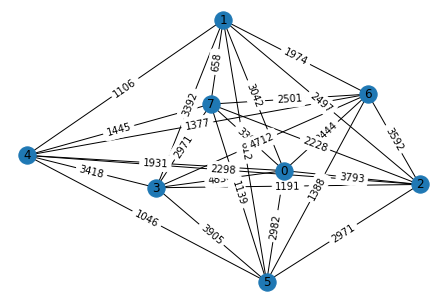

In [7]:
# Create graph from distance matrix
initial_g = utils.from_numpy_matrix(dist_matrix)

if debug:
    print("Initial graph")
    utils.print_edges_with_weight(initial_g)
    initial_g.plot_graph(os.path.join(debug_folder, 'graph.png'))


MST
Edge: (1, 5) = 612
Edge: (1, 7) = 658
Edge: (5, 4) = 1046
Edge: (7, 2) = 2228
Edge: (4, 6) = 1377
Edge: (4, 0) = 1931
Edge: (2, 3) = 1191


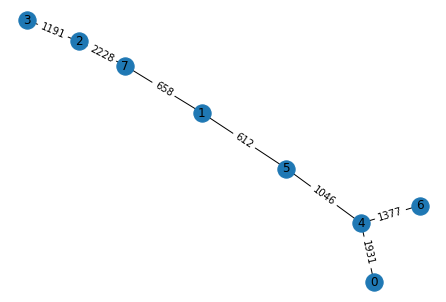

In [8]:
# Create MST
mst_graph = utils.get_mst(initial_g)
if debug:
    print('\nMST')
    utils.print_edges_with_weight(mst_graph)
    mst_graph.plot_graph(os.path.join(debug_folder, 'mst.png'))

In [9]:
mst_degrees = utils.get_degrees(mst_graph)
if debug:
    print(f"\nMST degree: {mst_degrees}")

odd_degrees = utils.get_nodes_odd_degrees(mst_degrees)
if debug:
    print(f"\nMST odd degree: {odd_degrees}")


MST degree: {1: 2, 5: 2, 7: 2, 4: 3, 2: 2, 3: 1, 6: 1, 0: 1}

MST odd degree: {4: 3, 3: 1, 6: 1, 0: 1}



Subgraph:
Edge: (0, 3) = 4830
Edge: (0, 4) = 1931
Edge: (0, 6) = 2444
Edge: (3, 4) = 3418
Edge: (3, 6) = 4712
Edge: (4, 6) = 1377


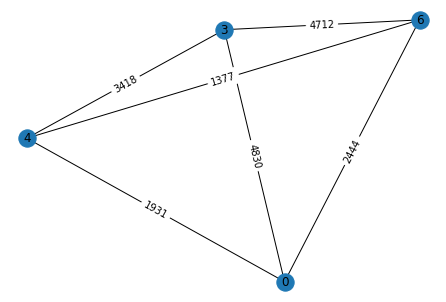

In [10]:
subgraph = utils.create_subgraph(initial_g, odd_degrees)
if debug:
    print("\nSubgraph:")
    utils.print_edges_with_weight(subgraph)
    subgraph.plot_graph(os.path.join(debug_folder, 'subgraph.png'))


Minimum weight perfect match:
Edge: (3, 4) = 3418
Edge: (0, 6) = 2444


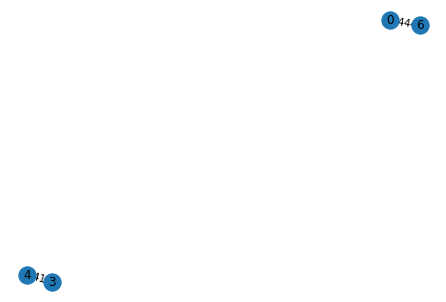

In [11]:
minimum_perfect_match = utils.create_minimum_weight_perfect_matching(subgraph)
if debug:
    print("\nMinimum weight perfect match:")
    utils.print_edges_with_weight(minimum_perfect_match)
    minimum_perfect_match.plot_graph(os.path.join(debug_folder, 'minimum_perfect_match.png'))


Union graph details:
Edge: (1, 5)
Edge: (1, 7)
Edge: (5, 4)
Edge: (7, 2)
Edge: (4, 6)
Edge: (4, 0)
Edge: (4, 3)
Edge: (2, 3)
Edge: (6, 0)


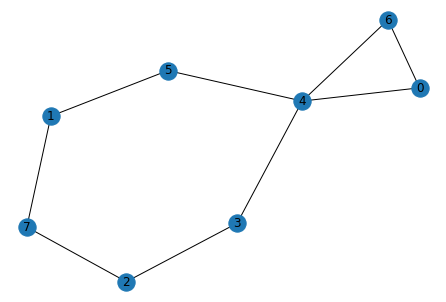

In [12]:
union_graph = utils.union_graphs(mst_graph, minimum_perfect_match)
if debug:
    print("\nUnion graph details:")
    utils.print_edges_with_weight(union_graph)
    union_graph.plot_graph(os.path.join(debug_folder, 'union_graph.png'))


 Euler tour: [(0, 6), (6, 4), (4, 3), (3, 2), (2, 7), (7, 1), (1, 5), (5, 4), (4, 0)]


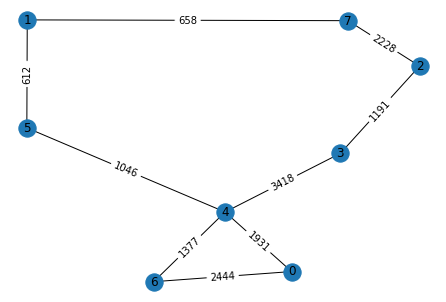

In [13]:
euler_tour_itr = union_graph.get_euler_tour(source_node)

euler_tour = []
for e in euler_tour_itr:
    euler_tour.append(e)

if debug:
    print(f"\n Euler tour: {euler_tour}")
    euler_g = Graph()
    for e in euler_tour:
        euler_g.add_edge(e[0], e[1], initial_g.get_edge_weight(e[0], e[1]))
    euler_g.plot_graph(os.path.join(debug_folder, 'euler_tour.png'))


Path: [0, 6, 4, 3, 2, 7, 1, 5, 0]
Total traveling cost: 14910


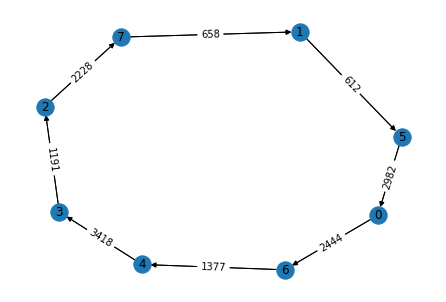

In [14]:
euler_tour = list(itertools.chain.from_iterable(list(euler_tour)))
euler_tour = list(dict.fromkeys(euler_tour).keys())
euler_tour.append(source_node)
print(f"\nPath: {euler_tour}")

if debug:
    final_path = Graph(di_graph=True)
    for i in range(len(euler_tour) - 1):
        final_path.add_edge(euler_tour[i], 
                            euler_tour[i + 1], 
                            initial_g.get_edge_weight(euler_tour[i], euler_tour[i + 1]))
    
    final_path.plot_graph(os.path.join(debug_folder, 'output.png'))

total_weight = utils.get_total_cost(initial_g, euler_tour)
print(f"Total traveling cost: {total_weight}")

In [15]:
ord_places = []
for i in range(len(places)):
    ord_places.append(places[euler_tour[i]])

In [16]:
print('legend: \n')
for i in range(len(ord_places)):
    print(i, ' = ', ord_places[i])

legend: 

0  =  YHA London Central Hostel
1  =  Buckingham Palace
2  =  The National Gallery
3  =  Leadenhall Market
4  =  St. Paul's Cathedral
5  =  Waterloo Station
6  =  Coca-Cola London Eye
7  =  Big Ben


In [17]:
# Sort lat and lng according to tour
new_lat = []
new_lng = []
idx = []

for i in euler_tour[:]:
    new_lat = np.append(new_lat, lat[i])
    new_lng = np.append(new_lng, lng[i])
    idx.append(i)

new_lat, new_lng

(array([51.5205605, 51.501364 , 51.508929 , 51.512766 , 51.5138453,
        51.5031653, 51.5032973, 51.5007292, 51.5205605]),
 array([-0.1427013, -0.14189  , -0.128299 , -0.0835289, -0.0983506,
        -0.1123051, -0.1195537, -0.1246254, -0.1427013]))

In [18]:
# draw lines and points (option)

import gmaps
gmaps.configure(api_key=password)

center = (np.mean(new_lat).astype(float), np.mean(new_lng).astype(float))
poi_locations = list(zip(new_lat, new_lng))

# fix too many tool box
fig = gmaps.figure(center=center, zoom_level=13)


fig.add_layer(gmaps.drawing_layer(features=[
    gmaps.Marker((new_lat[i], new_lng[i]), label='%s' % (i)) for i in range(len(ord_places))  
]))

fig.add_layer(gmaps.drawing_layer(features=[
    gmaps.Line((new_lat[i], new_lng[i]), 
               (new_lat[i + 1], new_lng[i + 1]), 
               stroke_weight=3.0) for i in range(len(ord_places))
]))   

fig

Figure(layout=FigureLayout(height='420px'))

In [19]:
print('legend: \n')
for i in range(len(ord_places)):
    print(i, ' = ', ord_places[i])

legend: 

0  =  YHA London Central Hostel
1  =  Buckingham Palace
2  =  The National Gallery
3  =  Leadenhall Market
4  =  St. Paul's Cathedral
5  =  Waterloo Station
6  =  Coca-Cola London Eye
7  =  Big Ben


In [20]:
# Draw real route

import gmaps
gmaps.configure(api_key=password)

fig = gmaps.figure(center=center, zoom_level=13)

fig.add_layer(gmaps.drawing_layer(features=[
    gmaps.Marker((new_lat[i], new_lng[i]), label='%s' % (i)) for i in range(len(places))  
]))

for i in range(len(places)):
    fig.add_layer(
        gmaps.directions.Directions((new_lat[i], new_lng[i]), (new_lat[i+1], new_lng[i+1]), mode='WALKING', show_markers=False)
    )

fig

Figure(layout=FigureLayout(height='420px'))

In [21]:
print('legend: \n')
for i in range(len(ord_places)):
    print(i, ' = ', ord_places[i])

legend: 

0  =  YHA London Central Hostel
1  =  Buckingham Palace
2  =  The National Gallery
3  =  Leadenhall Market
4  =  St. Paul's Cathedral
5  =  Waterloo Station
6  =  Coca-Cola London Eye
7  =  Big Ben
